In this file we develop our neural network for predicting house prices.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers

print(tf.__version__)


2.1.0


First steps:
- Importing the data from the preprocessing file.

- As an extra preproccessing step for the neural network we apply normalization, we discoverd this improves the validation score significantly. For this we first fit the scaler to the training data, i.e. determining the mean and deviation, subsequently the scaler is applied to both the train and test X.

In [6]:
# Importing the preprocessed data
from data_processing import import_and_clean_train, label_encoding
train_X, test_X, train_y, test_y, labels_dict = import_and_clean_train('train', label_encoding)

# Converting the data to arrays
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)

# Normalization as an extra preproccessing step for the neural network
scaler = preprocessing.StandardScaler().fit(train_X)

# Applying the scaler
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

Functions to plot the loss (mean absolute error) at each epoch and the predictions and errors in an insightful way:

In [7]:
# function used in the train function to plot the cost of the model
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 200000])
    plt.xlabel('Epoch')
    plt.ylabel('Error [SalePrice]')
    plt.legend()
    plt.grid(True)
    plt.show()

# funtion to plot the prediction of the test data
def plot_predictions(model):
    test_predictions = model.predict(test_X).flatten()
    a = plt.axes(aspect='equal')
    plt.scatter(test_y, test_predictions)
    plt.xlabel('True Values [SalePrice]')
    plt.ylabel('Predictions [SalePrice]')
    lims = [0, 500000]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

# funtion to plot the error distribution of the model
def plot_errors(model):
    test_predictions = model.predict(test_X).flatten()
    error = test_predictions - test_y
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [SalePrice]')
    _ = plt.ylabel('Count')
    plt.show()


For milestone x we added a flexible learning rate and discovered this also slightly improved performance depending on the amount of epochs we tested with.

In [8]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.09)

Function to train and evaluate a model which layers are defined outside it, we use this to easily build and compare models, it also plots the train and test results.

In [9]:
def train_and_evaluate(model, train_x, train_y, val_x, val_y, epochs=100):

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(lr_schedule), metrics=['msle', 'MAPE'])

    history = model.fit(x=train_x, y=train_y, validation_data=(val_x, val_y), verbose=0, epochs=epochs)

#     plot_loss(history)

    print(f"Train loss: {history.history['loss'][-1]}, val_loss {history.history['val_loss'][-1]}")
    
    print(f"rmsle: {np.sqrt(history.history['msle'][-1])}")
    fig, axs = plt.subplots(1,2,figsize=(20,5)) 

    for i, metric in enumerate(['loss', 'MAPE']):
        axs[i].plot(history.history[metric])
        axs[i].plot(history.history['val_'+metric])
        axs[i].legend(['training', 'validation'], loc='best')

        axs[i].set_title('Model '+metric)
        axs[i].set_ylabel(metric)
        axs[i].set_xlabel('epoch')

    plt.show()
    
    tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')

Preliminary model optimized on validation loss:

Train loss: 33668.85035087451, val_loss 20594.22984446347
rmsle: 0.2544771134853363


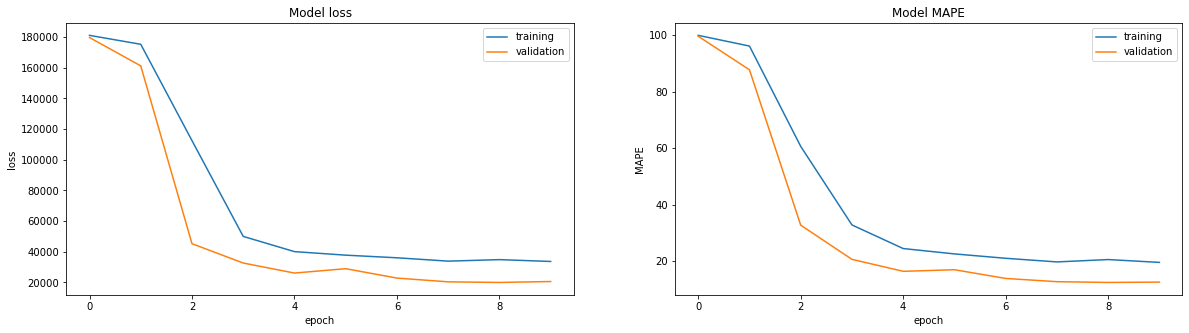

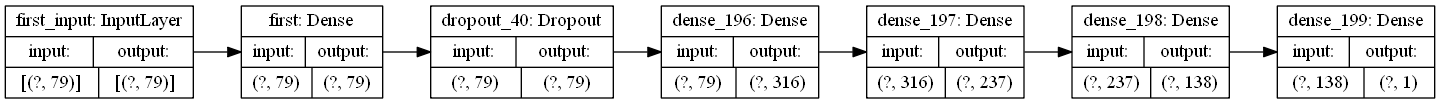

In [43]:
model = models.Sequential()

model.add(layers.Dense(79, activation='relu', input_shape=(79,), name='first'))
model.add(layers.Dropout(.5))

model.add(layers.Dense(316, activation='relu'))

model.add(layers.Dense(237, activation='relu'))

model.add(layers.Dense(138, activation='relu'))

model.add(layers.Dense(1))

train_and_evaluate(model, train_X, train_y, test_X, test_y, epochs=10)

 

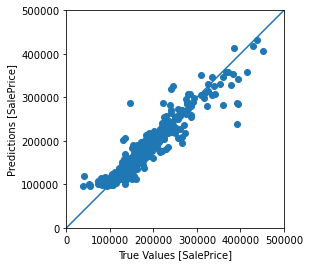

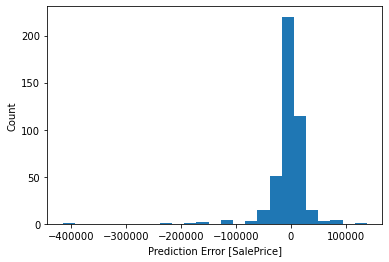

In [9]:
# Plotting the predictions of the test data based on the model
plot_predictions(model)
plot_errors(model)

Preliminary model optimized for training loss:

Train loss: 7321.4697236761085, val_loss 20659.37535470546
rmsle: 0.08312933892011642


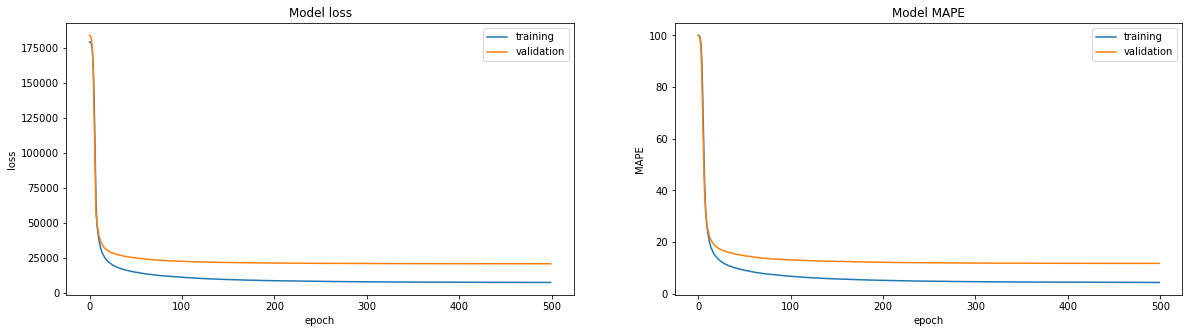

In [10]:
model = models.Sequential()
model.add(layers.Dense(79, activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)))

model.add(layers.Dense(158, activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)))

model.add(layers.Dense(79, activation='relu',
                      kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(1))



train_and_evaluate(model, train_X, train_y, test_X, test_y, epochs=500)

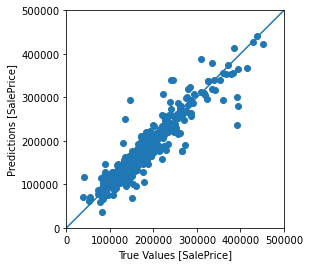

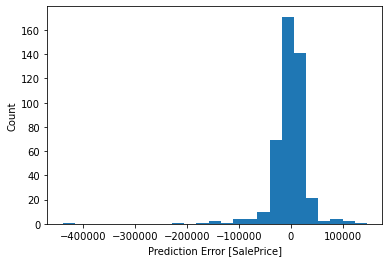

In [11]:
# Plotting the predictions of the test data based on the model
plot_predictions(model)
plot_errors(model)

Train loss: 26249.68215632697, val_loss 22740.615369073275
rmsle: 0.26969048380851746


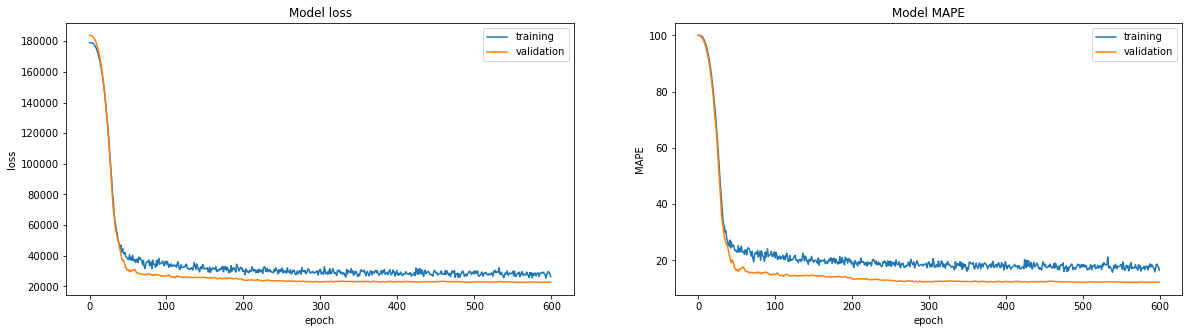

In [12]:
model = models.Sequential()
model.add(layers.Dense(79, activation='relu'))
model.add(layers.Dropout(.5))

model.add(layers.Dense(316, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.5))

model.add(layers.Dense(237, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.5))

model.add(layers.Dense(138, activation='relu'))

model.add(layers.Dense(1))

train_and_evaluate(model, train_X, train_y, test_X, test_y, epochs=600)



Models for experimentation based on the architecture of the preliminary model:

Train loss: 20118.023364378078, val_loss 17996.91366738506
rmsle: 0.1503192037343979


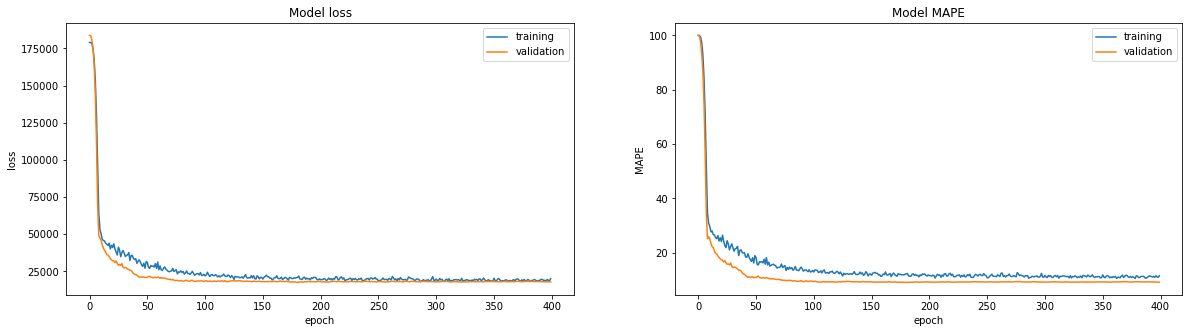

In [13]:
model = models.Sequential()
model.add(layers.Dense(79, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001)
                      ))
model.add(layers.Dropout(.5))

model.add(layers.Dense(316, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001)
                      ))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.5))

model.add(layers.Dense(237, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001)
                      ))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))

model.add(layers.Dense(138, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001)
                      ))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(.2))

model.add(layers.Dense(79, activation='relu',
                       kernel_regularizer=regularizers.l2(0.0001)
                      ))

model.add(layers.Dense(1))

train_and_evaluate(model, train_X, train_y, test_X, test_y, epochs=400)

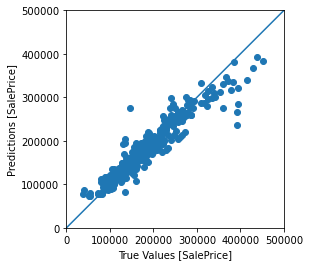

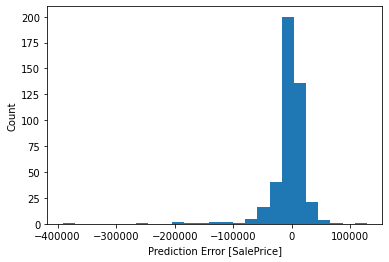

In [14]:
# Plotting the predictions of the test data based on the model
plot_predictions(model)
plot_errors(model)

Importing the complete dataset for making different train/val split for k-fold:

In [10]:
from data_processing import cleaned_dataframe

df, dicto = cleaned_dataframe('train', encoder=label_encoding)

inputs = df.drop('SalePrice', axis=1)
targets = df.pop('SalePrice')

(1460, 79)


Function to evaluate a model with k-fold:

Train loss: 19189.195633561645, val_loss 19058.572131849316
Score for fold 1: loss of 19058.572131849316; MAPE of 9.866861343383789
Train loss: 18235.658417166094, val_loss 17095.09944884418
Score for fold 2: loss of 17095.09944884418; MAPE of 11.163578987121582
Train loss: 19061.16585509418, val_loss 16046.349823416096
Score for fold 3: loss of 16046.349823416096; MAPE of 9.422517776489258
Train loss: 17768.313677226026, val_loss 16190.095542594177
Score for fold 4: loss of 16190.095542594177; MAPE of 10.124642372131348
Train loss: 18794.257156999145, val_loss 16060.254896190068
Score for fold 5: loss of 16060.254896190068; MAPE of 9.867671966552734


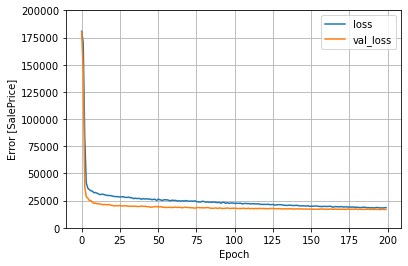

Average train loss is: 18609.718148009415, average validation loss is: 16890.074368578767


In [21]:
from sklearn.model_selection import KFold

# Model properties for k fold evaluation
epochs = 200

# Number of folds
fold_no = 1
num_folds = 5

# Lists to store loss per fold
train_per_fold = []
val_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
for train_index, test_index in kfold.split(inputs):
    X_train, X_test = np.array(inputs.iloc[train_index]), np.array(inputs.iloc[test_index])
    y_train, y_test = np.array(targets.iloc[train_index]), np.array(targets.iloc[test_index])
    
    scaler = preprocessing.StandardScaler().fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Model as defined previously
    model = models.Sequential()

    model.add(layers.Dense(79, activation='relu'))
    model.add(layers.Dropout(.5))

    model.add(layers.Dense(316, activation='relu'))

    model.add(layers.Dense(237, activation='relu'))

    model.add(layers.Dense(138, activation='relu'))

    model.add(layers.Dense(1))
    
    # Compile and fit as previously in train_and_evaluate    
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(lr_schedule), metrics=['MAPE'])

    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        verbose=0, epochs=epochs)
    
    # Plot or print the results per fold
#     plot_loss(history)
    print(f"Train loss: {history.history['loss'][-1]}, val_loss {history.history['val_loss'][-1]}")

    # Generate generalization metrics
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
    
    # Store the train and val loss per fold to get the average
    train_per_fold.append(history.history['loss'])
    val_per_fold.append(history.history['val_loss'])

    # Increase fold number
    fold_no = fold_no + 1

# Getting the average performance of the folds
train_av = train_per_fold[0]
val_av = val_per_fold[0]

# Adding the arrays
for i in range(1, num_folds):
    train_av = np.add(train_av, train_per_fold[i])
    val_av = np.add(val_av, val_per_fold[i])
    
# Calculating the average
train_av = train_av / num_folds
val_av = val_av / num_folds

# Plotting the k-fold evaluation
plt.plot(train_av, label='loss')
plt.plot(val_av, label='val_loss')
plt.ylim([0, 200000])
plt.xlabel('Epoch')
plt.ylabel('Error [SalePrice]')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average train loss is: {train_av[-1]}, average validation loss is: {val_av[-1]}")
